# Code for Outlier Detection Using Standard Deviation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

 Returns a normally-distributed dataset of student scores containing 200 records.

In [2]:
def generate_scores(mean:int=60,std_dev:int=12,num_samples:int=200):
    np.random.seed(27)
    scores = np.random.normal(loc=mean,scale=std_dev,size=num_samples)
    scores = np.round(scores, decimals=0)
    return scores
scores_data = generate_scores()

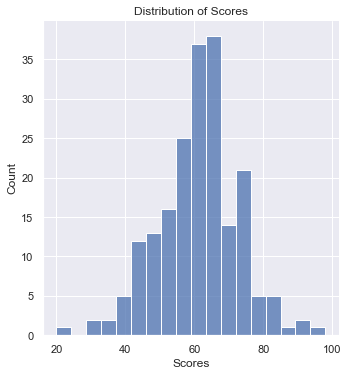

In [3]:
sns.set_theme()
sns.displot(data=scores_data).set(title="Distribution of Scores", xlabel="Scores")

In [5]:
df_scores = pd.DataFrame(scores_data,columns=['score'])
df_scores.head()

,score
0,75.0
1,56.0
2,67.0
3,65.0
4,63.0


In [21]:
df_scores.describe()
df_scores.mean()

61.005

In [22]:
lower_limit = df_scores.mean().item() - 3*df_scores.std().item()
upper_limit = df_scores.mean().item() + 3*df_scores.std().item()
print(lower_limit)
print(upper_limit)

25.441697037705573
96.56830296229444


In [24]:
df_scores_filtered = df_scores[
    (df_scores['score'] > lower_limit) & (df_scores['score'] < upper_limit)
    ]
print(df_scores_filtered)

     score
0     75.0
1     56.0
2     67.0
3     65.0
4     63.0
..     ...
194   42.0
195   76.0
196   67.0
197   74.0
199   53.0

[198 rows x 1 columns]


From 200 rows down to 198 rows above

# Code for Outlier Detection Using Z-Score

In [25]:
df_scores['z_score'] = (
    df_scores['score'] - df_scores['score'].mean().item()
    ) / df_scores['score'].std().item()
df_scores.head()

,score,z_score
0,75.0,1.180571
1,56.0,-0.422205
2,67.0,0.505718
3,65.0,0.337005
4,63.0,0.168291


You can filter the dataframe df_scores to retain points whose z-scores are in the range [-3, 3], as shown below. The filtered dataframe contains 198 records, as expected.

The methods involving standard deviation and z-scores can be used only when the data set, or the feature that you are examining, follows a normal distribution.

Next, we’ll discuss two outlier detection techniques that can be used independently of the data distribution.

# Code for Outlier Detection Using Interquartile Range (IQR)

[Text(0.5, 1.0, 'Box Plot of Scores')]

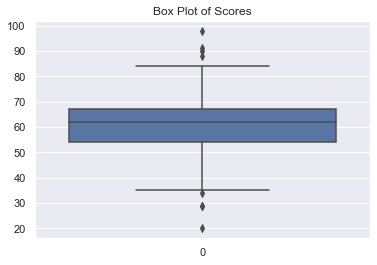

In [26]:
sns.boxplot(data=scores_data).set(title="Box Plot of Scores")

In [27]:
df_scores.describe()

,score,z_score
count,200.000000,2.000000e+02
mean,61.005000,-2.131628e-16
std,11.854434,1.000000e+00
min,20.000000,-3.459043e+00
25%,54.000000,-5.909181e-01
50%,62.000000,8.393484e-02
75%,67.000000,5.057179e-01
max,98.000000,3.120773e+00


In [28]:
IQR = 67-54
lower_limit = 54 - 1.5*IQR
upper_limit = 67 + 1.5*IQR
print(upper_limit)
print(lower_limit)

86.5
34.5


In [29]:
df_scores_filtered = df_scores[
    (df_scores['score']>lower_limit) & (df_scores['score']<upper_limit)
    ]
print(df_scores_filtered)

     score   z_score
0     75.0  1.180571
1     56.0 -0.422205
2     67.0  0.505718
3     65.0  0.337005
4     63.0  0.168291
..     ...       ...
194   42.0 -1.603198
195   76.0  1.264928
196   67.0  0.505718
197   74.0  1.096214
199   53.0 -0.675275

[192 rows x 2 columns]


As seen in the output, this method labels eight points as outliers, and the filtered dataframe is 192 records long.

You don't always have to call the describe method to identify the quartiles. You may instead use the percentile() function in NumPy. It takes in two arguments, a: an array or a dataframe and q: a list of quartiles.

The code cell below shows how you can calculate the first and the third quartiles using the percentile function.

In [34]:
q25,q75 = np.percentile(a = df_scores['score'],q=[25,75])
IQR = q75 - q25
print(IQR)

13.0


# Code for Outlier Detection Using Percentile

In [35]:
lower_limit, upper_limit = np.percentile(a=df_scores['score'],q=[0.5,99.5])
print(upper_limit)
print(lower_limit)

91.03499999999997
28.955


In [36]:
df_scores_filtered = df_scores[
    (df_scores['score']>lower_limit) & (df_scores['score']<upper_limit)
    ]
print(df_scores_filtered)

     score   z_score
0     75.0  1.180571
1     56.0 -0.422205
2     67.0  0.505718
3     65.0  0.337005
4     63.0  0.168291
..     ...       ...
194   42.0 -1.603198
195   76.0  1.264928
196   67.0  0.505718
197   74.0  1.096214
199   53.0 -0.675275

[198 rows x 2 columns]


From the code cell above, you can see that there are two outliers, and the filtered dataframe has 198 data records.